# Scottish Borders Council Analysis

In [1]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [2]:
from data_reader_writer import data_writer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pypsa

In [3]:
year = 2019

In [4]:
start = str(year) + '-01-01 00:00:00'
end = str(year) + '-12-31 23:30:00'
# time step as fraction of hour
time_step = 1.0
if year > 2020:
    data_writer(start, end, time_step, year, year_baseline=2020, scenario='Leading The Way')
if year <= 2020:
    data_writer(start, end, time_step, year)

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value


In [5]:
network = pypsa.Network()

network.import_from_csv_folder('LOPF_data')

Importing PyPSA from older version of PyPSA than current version.
Please read the release notes at https://pypsa.readthedocs.io/en/latest/release_notes.html
carefully to prepare your network for import.
Currently used PyPSA version [0, 19, 2], imported network file PyPSA version None.

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
INFO:pypsa.io:Imported network LOPF_data has buses, generators, lines, loads, storage_units


The bus Eccles is the closest geographically to the Scottish Borders Council area.

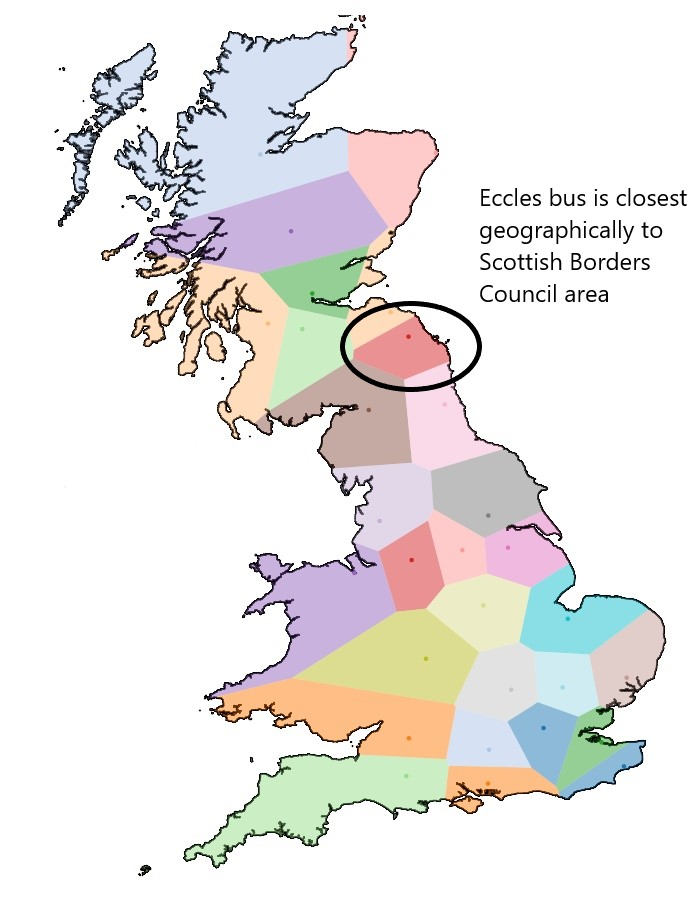

In [6]:
file = '../pics/voronoi_reduced_model.jpg'
from IPython.display import Image
Image(filename=file)

However, because many of the wind farms are on the edge of the area they have ended up in the surrounding buses.

In [7]:
network.generators.loc[network.generators['bus'] == 'Eccles']

,carrier,type,p_nom,bus,marginal_cost,ramp_limit_up,ramp_limit_down,p_max_pu,control,p_nom_extendable,...,committable,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Middlemoor,Wind Onshore,Wind Onshore,52.372210,Eccles,0.0,1.0,1.0,NaN,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Barmoor South Wind Farm (Resubmission),Wind Onshore,Wind Onshore,13.384010,Eccles,0.0,1.0,1.0,NaN,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Wandylaw,Wind Onshore,Wind Onshore,19.882044,Eccles,0.0,1.0,1.0,NaN,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Langhope Rig,Wind Onshore,Wind Onshore,15.517693,Eccles,0.0,1.0,1.0,NaN,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0


We use the Scottish Borders list of windfarms to move these to the Eccles bus.

In [8]:
df_wind_farms = pd.read_excel(r'..\data\Windfarm_Database_June_2021___CSV.xlsx', sheet_name='Sheet1')
SBC_wind_farms = df_wind_farms['Name in PyPSA-GB'].values

for name in SBC_wind_farms:
    network.generators.bus[name] = 'Eccles'

network.generators.loc[network.generators['bus'] == 'Eccles']

,carrier,type,p_nom,bus,marginal_cost,ramp_limit_up,ramp_limit_down,p_max_pu,control,p_nom_extendable,...,committable,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Crystal Rig Phase 1,Wind Onshore,Wind Onshore,60.615986,Eccles,0.0,1.0,1.0,NaN,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Carcant Windfarm,Wind Onshore,Wind Onshore,5.819135,Eccles,0.0,1.0,1.0,NaN,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Bowbeat Wind Farm,Wind Onshore,Wind Onshore,30.259500,Eccles,0.0,1.0,1.0,NaN,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Crystal Rig Wind Farm Phase 2a,Wind Onshore,Wind Onshore,133.840100,Eccles,0.0,1.0,1.0,NaN,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Toddleburn,Wind Onshore,Wind Onshore,26.768020,Eccles,0.0,1.0,1.0,NaN,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Crystal Rig Extension II,Wind Onshore,Wind Onshore,20.076015,Eccles,0.0,1.0,1.0,NaN,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Glenkerie Wind Farm,Wind Onshore,Wind Onshore,21.336828,Eccles,0.0,1.0,1.0,NaN,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Dun Law,Wind Onshore,Wind Onshore,16.681520,Eccles,0.0,1.0,1.0,NaN,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Black Hill (Borders),Wind Onshore,Wind Onshore,27.737875,Eccles,0.0,1.0,1.0,NaN,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0


There are differences in the reported capacities of the wind farms in PyPSA-GB (total 1,417MW) compared to the SBC wind farm list (total 1,356 MW).

In [9]:
network.generators.loc[network.generators['bus'] == 'Eccles'].p_nom.sum() / 0.91

1512.3355634065933

For 2020 Eccles has annual demand of around 500 GWh, compared to BEIS data showing 519GWh (https://www.gov.uk/government/statistical-data-sets/regional-and-local-authority-electricity-consumption-statistics).

In [10]:
network.loads_t.p_set.Eccles.sum()

532329.893156

Run the optimisation...

In [11]:
def merge_gen(network, year):

    df_gen = network.generators
    df_gen_p = network.generators_t.p_max_pu

    carriers = ['Wind Offshore', 'Wind Onshore', 'Solar Photovoltaics', 'Large Hydro', 'Small Hydro', 'Interconnector']
    buses = df_gen['bus'].unique()
    df_list = []
    df_gen_p_list = []

    for c in carriers:
        for b in buses:
            df_carrier_bus = df_gen.loc[(df_gen.carrier == c) & (df_gen.bus == b)]
            carrier_bus_aggregated = df_carrier_bus.p_nom.sum()
            index = [c + ' ' + b]

            # change the p-max_pu
            list_of_sites = df_gen.loc[(df_gen.carrier == c) & (df_gen.bus == b)].index
            gen_p_bus = []
            for gen in list_of_sites:

                try:
                    gen_p_bus.append(df_gen_p.loc[:, gen] * df_carrier_bus.loc[gen, 'p_nom'])
                except KeyError:
                    pass
            try:
                df_gen_p_new = pd.concat(gen_p_bus, axis=1)
                df_gen_p_new['sum'] = df_gen_p_new.sum(axis=1)
                df_gen_p_new[c + ' ' + b] = df_gen_p_new['sum'] / carrier_bus_aggregated
                df_gen_p_list.append(df_gen_p_new[c + ' ' + b])
            except ValueError:
                pass

            # change generators
            if carrier_bus_aggregated > 0:
                df_carrier_bus = pd.DataFrame([df_carrier_bus.iloc[-1, :]], index=index)
                df_carrier_bus.p_nom = carrier_bus_aggregated
                df_list.append(df_carrier_bus)

        df_gen = df_gen[~df_gen.carrier.str.contains(c)]

    df_gen_p = pd.concat(df_gen_p_list, axis=1)
    df_gen_p = df_gen_p.fillna(0)
    # just to ensure no negative values
    df_gen_p[df_gen_p < 0] = 0
    # add in interconnectors p_max_pu

    df_gen_res = pd.concat(df_list)
    # add in new generators
    df_gen = df_gen.append(df_gen_res)

    df_gen.to_csv('LOPF_data/generators.csv', header=True)
    df_gen_p.to_csv('LOPF_data/generators-p_max_pu.csv', header=True)

    return_dic = {'network.generators': df_gen, 'network.generators_t.p_max_pu': df_gen_p}

    if year >= 2021:
        # check if generators-p_min_pu exists and delete if so
        # used in historical simulations but not wanted in future sims
        try:
            file = 'LOPF_data/generators-p_min_pu.csv'
            os.remove(file)
        except Exception:
            pass
        try:
            file = 'UC_data/generators-p_min_pu.csv'
            os.remove(file)
        except Exception:
            pass

    return return_dic

# first step of merging generators at buses to speed up optimisation
merging_return = merge_gen(network, year)
network.generators = merging_return['network.generators']
network.generators_t.p_max_pu = merging_return['network.generators_t.p_max_pu']
# network.generators
network.lopf(network.snapshots, solver_name="gurobi", pyomo=False)

INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 148.14s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Set parameter Username
Academic license - for non-commercial use only - expires 2022-09-03
Read LP format model from file C:\Users\alyden\AppData\Local\Temp\pypsa-problem-z969gehm.lp
Reading time = 90.21 seconds
obj: 28205762 rows, 7323361 columns, 49850280 nonzeros
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 28205762 rows, 7323361 columns and 49850280 nonzeros
Model fingerprint: 0xe29b0ace
Coefficient statistics:
  Matrix range     [6e-05, 1e+00]
  Objective range  [1e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-06, 9e+03]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 0 rows and 0 columns (presolve time = 31s) ...
Presolve removed 27145818 rows and 43801 columns (presolve time = 36s) ...
Presolve removed 27145818 rows and 219039 columns (presolve time = 42s) ...
Presolve removed 27145818 rows and 219039 

INFO:pypsa.linopf:Optimization successful. Objective value: 5.90e+09


('ok', 'optimal')

snapshot
2019-01-01 00:00:00    49.768070
2019-01-01 01:00:00    49.920820
2019-01-01 02:00:00    48.681442
2019-01-01 03:00:00    46.958206
2019-01-01 04:00:00    45.061184
                         ...    
2019-12-31 19:00:00    72.861640
2019-12-31 20:00:00    68.706300
2019-12-31 21:00:00    63.454266
2019-12-31 22:00:00    58.772076
2019-12-31 23:00:00    55.560673
Name: Eccles, Length: 8760, dtype: float64


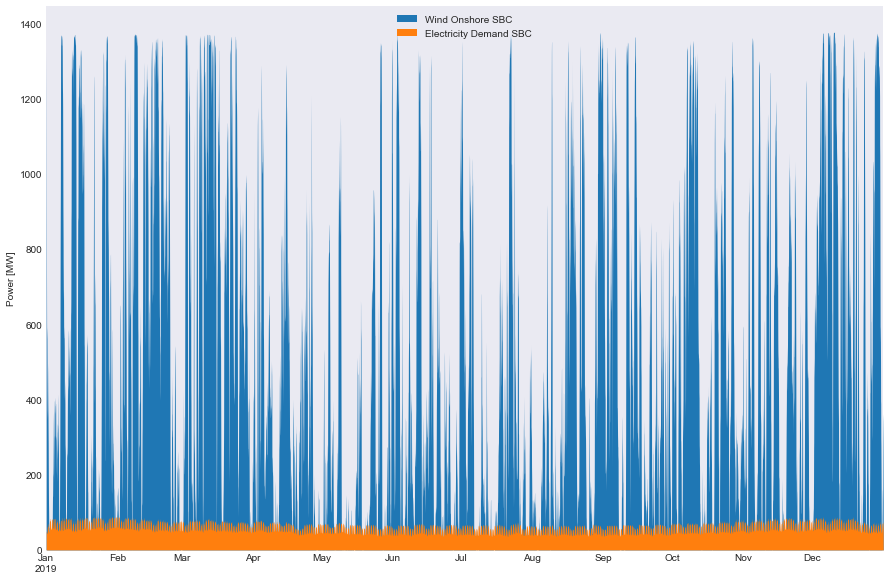

In [12]:
plt.style.use('seaborn-dark')

p_eccles = network.generators_t.p['Wind Onshore Eccles']
demand_eccles = network.loads_t.p['Eccles']
print(demand_eccles)
demand_eccles.name = 'Demand Eccles'

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_eccles.rename('Wind Onshore SBC').plot(kind="area", ax=ax, linewidth=0)
demand_eccles.rename('Electricity Demand SBC').plot(kind="area", ax=ax, linewidth=0)
ax.set_xlabel("")
ax.set_ylabel("Power [MW]")
ax.legend()
plt.show()

The total modelled generation from wind in Eccles was 4,689 GWh, while the total demand was 500 GWh.

Generation is almost 10x larger than demand.

As a sense check there are 1,356 MW of wind farms on Scottish Borders list which assuming a capacity factor of 30%, gives 1358 * 8760 * 0.3 = 3,564 GWh.

In [13]:
p_eccles.sum()

4420605.500773

In [14]:
demand_eccles.sum()

532329.893156

In [15]:
p_by_carrier = network.generators_t.p.groupby(
    network.generators.carrier, axis=1).sum()

storage_by_carrier = network.storage_units_t.p.groupby(
    network.storage_units.carrier, axis=1).sum()

# to show on graph set the negative storage values to zero
storage_by_carrier[storage_by_carrier < 0] = 0

p_by_carrier = pd.concat([p_by_carrier, storage_by_carrier], axis=1)

# interconnector exports
exports = network.loads_t.p
# multiply by negative one to convert it as a generator
# i.e. export is a positive load, but negative generator
exports['Interconnectors Export'] = exports.iloc[:, -6:].sum(axis=1) * -1
interconnector_export = exports[['Interconnectors Export']]

# group biomass stuff
p_by_carrier['Biomass'] = (
    p_by_carrier['Biomass (dedicated)'] + p_by_carrier['Biomass (co-firing)'] +
    p_by_carrier['Landfill Gas'] + p_by_carrier['Anaerobic Digestion'] +
    p_by_carrier['Sewage Sludge Digestion'])

# rename the hydro bit
p_by_carrier = p_by_carrier.rename(
    columns={'Large Hydro': 'Hydro'})
p_by_carrier = p_by_carrier.rename(
    columns={'Interconnector': 'Interconnectors Import'})

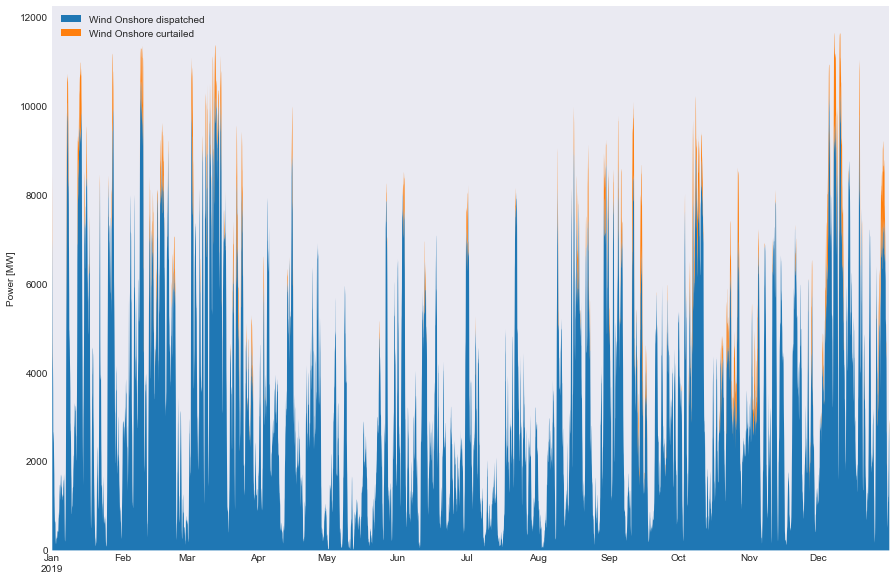

In [16]:
carrier = "Wind Onshore"

capacity = network.generators.groupby("carrier").sum().at[carrier, "p_nom"]
p_available = network.generators_t.p_max_pu.multiply(network.generators["p_nom"])
p_available_by_carrier = p_available.groupby(network.generators.carrier, axis=1).sum()
p_curtailed_by_carrier = p_available_by_carrier - p_by_carrier
p_df = pd.DataFrame({carrier + " available": p_available_by_carrier[carrier],
                     carrier + " dispatched": p_by_carrier[carrier],
                     carrier + " curtailed": p_curtailed_by_carrier[carrier]})

p_df[carrier + " capacity"] = capacity
p_df["Wind Onshore curtailed"][p_df["Wind Onshore curtailed"] < 0.] = 0.
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
p_df[[carrier + " dispatched", carrier + " curtailed"]].plot(kind="area", ax=ax, linewidth=0)

ax.set_xlabel("")
ax.set_ylabel("Power [MW]")
ax.legend()

Percentage of wind curtailed

In [17]:
round(100 * (p_curtailed_by_carrier['Wind Onshore'].sum()) / p_available_by_carrier['Wind Onshore'].sum(), 1)

4.4

<AxesSubplot:xlabel='snapshot'>

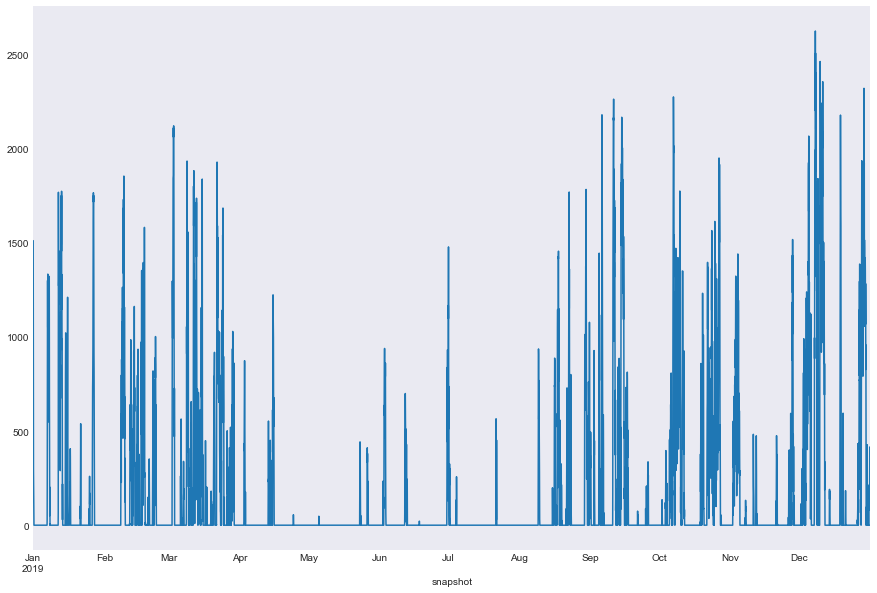

In [20]:
p_curtailed_by_carrier['Wind Onshore'].plot(figsize=(15,10))